In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
data = pd.read_csv('/content/credit_card_default.csv')

In [ ]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [ ]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
#no missing values

In [ ]:
#no object columns thus need for encoding

In [ ]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#dropping unique id column

In [ ]:
data.drop('ID',axis = 1,inplace = True)

In [ ]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
#splitting data into x and y

<Axes: >

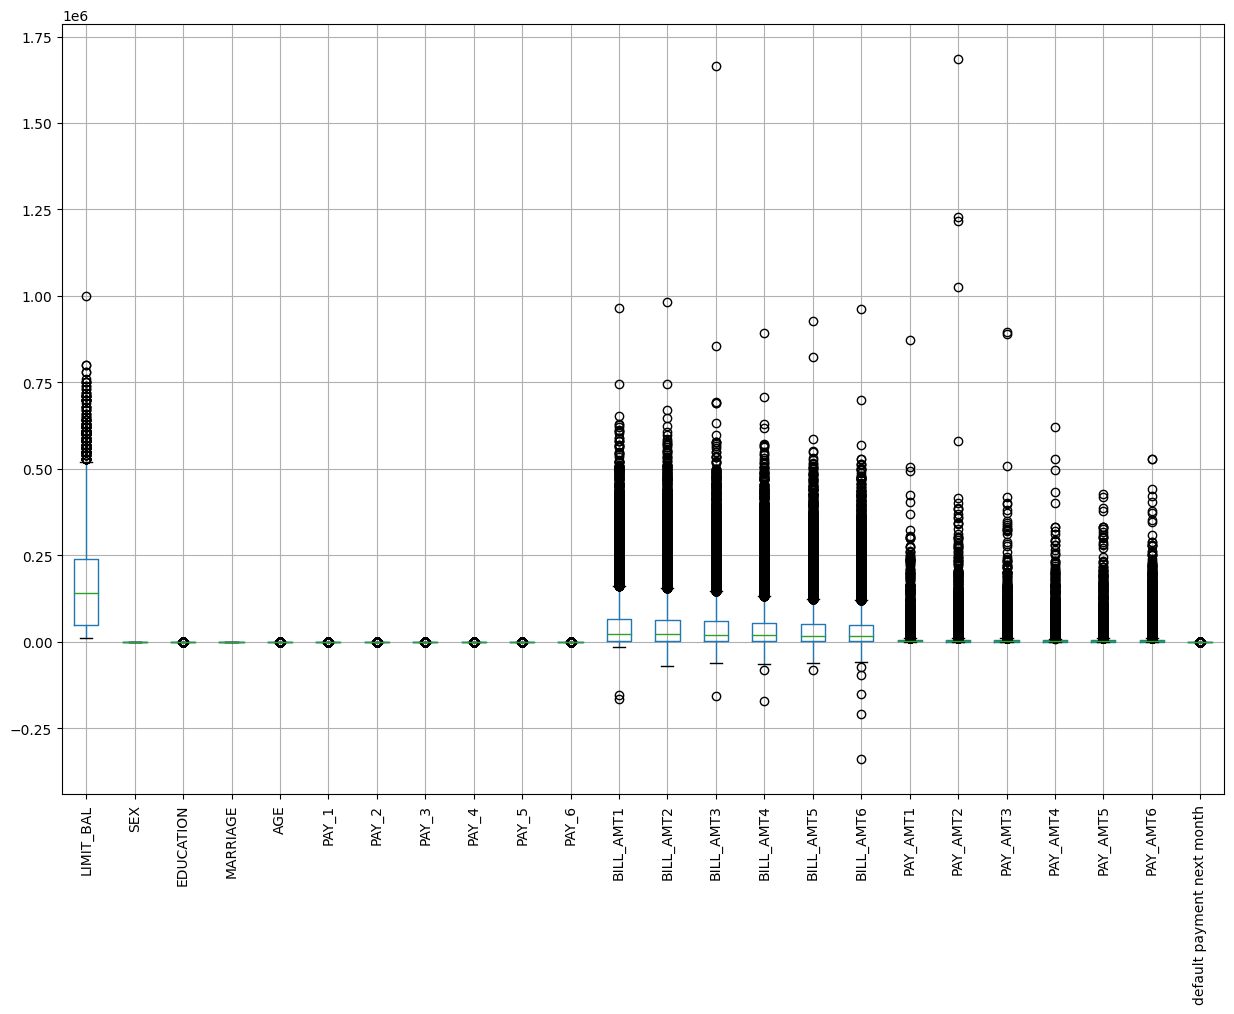

In [ ]:
data.boxplot(figsize=(15,10),rot=90)

In [ ]:
pd.set_option('display.max_columns',None)
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#capping outliers

In [ ]:
out_colm = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
for i in out_colm:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  upper = Q3 + (1.5*IQR)
  lower = Q1 - (1.5*IQR)
  data[i] = data[i].map(lambda x: upper if x > upper else lower if x < lower else x)

In [ ]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,166967.489333,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,44293.480167,42394.577817,40125.597017,36551.073642,33754.151258,32595.088604,3496.730800,3422.306967,3035.817900,2718.296075,2731.547167,2714.437875,0.221200
std,128013.394323,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,51294.870270,49266.963176,46699.554039,42751.481350,39896.030557,39367.735129,3492.742781,3532.819886,3355.632738,3073.301491,3094.091228,3131.180741,0.415062
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-91739.625000,-69777.000000,-83581.500000,-75942.125000,-70878.250000,-70657.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2666.250000,2326.750000,1763.000000,1256.000000,1000.000000,833.000000,390.000000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,20088.500000,19052.000000,18104.500000,17071.000000,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,60164.750000,54506.000000,50190.500000,49198.250000,5006.000000,5000.000000,4505.000000,4013.250000,4031.500000,4000.000000,0.000000
max,525000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,162389.375000,155538.500000,146412.500000,132774.875000,122831.750000,121111.625000,11015.000000,11250.500000,10677.500000,9589.125000,9700.000000,9823.375000,1.000000


In [ ]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
data['MARRIAGE'].unique()

array([1, 2, 3])

In [ ]:
data['SEX'].unique()

array([2, 1])

In [ ]:
data['PAY_1'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [ ]:
data['PAY_6'].unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5])

In [ ]:
#splitting data into x and y

In [ ]:
x = data.drop('default payment next month',axis = 1)

In [ ]:
y = data['default payment next month']

In [ ]:
#scale

In [ ]:
std = StandardScaler()

In [ ]:
x.loc[:,:] = std.fit_transform(x)

In [ ]:
#train-test splitting

In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.25)

In [ ]:
skfold = StratifiedKFold(n_splits=5)

In [ ]:
#logistic regression

In [ ]:
lr = LogisticRegression()

In [ ]:
score_skf_lr = cross_val_score(lr,x_train,y_train,cv=skfold)

In [ ]:
score_skf_lr

array([0.80844444, 0.80466667, 0.80333333, 0.80955556, 0.80711111])

In [ ]:
print('skf score of lr: ' , score_skf_lr.mean())

skf score of lr:  0.8066222222222222


In [ ]:
#svm

In [ ]:
svc = SVC(kernel = 'rbf')

In [ ]:
score_skf_svc = cross_val_score(svc,x_train,y_train,cv=skfold)

In [ ]:
score_skf_lr

array([0.80844444, 0.80466667, 0.80333333, 0.80955556, 0.80711111])

In [ ]:
print('skf score of svc: ' , score_skf_svc.mean())

skf score of svc:  0.8201333333333334


In [ ]:
#knn

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)

In [ ]:
score_skf_knn = cross_val_score(knn,x_train,y_train,cv=skfold)

In [ ]:
score_skf_knn

array([0.79177778, 0.79022222, 0.78933333, 0.78955556, 0.78777778])

In [ ]:
print('skf score of knn: ' , score_skf_knn.mean())

skf score of knn:  0.7897333333333333


In [ ]:
#naiveBayes

In [ ]:
nbc  = GaussianNB()

In [ ]:
score_skf_nbc = cross_val_score(nbc,x_train,y_train,cv=skfold)

In [ ]:
print('skf score of nbc: ' , score_skf_nbc.mean())

skf score of nbc:  0.7833333333333334


In [ ]:
#descision tree

In [ ]:
dtclf = DecisionTreeClassifier(criterion='gini', max_depth=10)

In [ ]:
score_skf_dtclf = cross_val_score(dtclf,x_train,y_train,cv=skfold)

In [ ]:
print('skf score of dtclf: ' , score_skf_dtclf.mean())

skf score of dtclf:  0.8031111111111111


In [ ]:
#randomforests

In [ ]:
rfclf = RandomForestClassifier(n_estimators=100,criterion='gini')

In [ ]:
score_skf_rfclf = cross_val_score(rfclf,x_train,y_train,cv=skfold)

In [ ]:
print('skf score of rfclf: ' , score_skf_rfclf.mean())

skf score of rfclf:  0.8169333333333334


In [ ]:
#adaboost

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=100)

In [ ]:
score_skf_ada_clf = cross_val_score(ada_clf,x_train,y_train,cv=skfold)

In [ ]:
print('skf score of ada_clf: ' , score_skf_ada_clf.mean())

skf score of ada_clf:  0.8165777777777778


In [ ]:
#gradientboost

In [ ]:
gb_clf =GradientBoostingClassifier(n_estimators=100)

In [ ]:
score_skf_gb_clf = cross_val_score(gb_clf,x_train,y_train,cv=skfold)

In [ ]:
print('skf score of gb_clf: ' , score_skf_gb_clf.mean())

skf score of gb_clf:  0.8215555555555556


In [ ]:
#XGBoost

In [ ]:
xgb_clf = XGBClassifier(n_estimators=100)

In [ ]:
score_skf_xgb_clf = cross_val_score(xgb_clf,x_train,y_train,cv=skfold)

In [ ]:
print('skf score of xgb_clf: ' , score_skf_xgb_clf.mean())

skf score of xgb_clf:  0.812


In [ ]:
#Without hyperparameter tuning, GradientBoost gave the highest accuracy score

In [ ]:
#building a gradient boost model

In [ ]:
gb_clf =GradientBoostingClassifier(n_estimators=100)

In [ ]:
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gb = gb_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_gb,y_test)

0.8218666666666666

In [ ]:
print('accuracy score of GradientBoost: ' , accuracy_score(y_pred_gb,y_test))

accuracy score of GradientBoost:  0.8218666666666666


With Hyperparameter tuning

In [ ]:
#Logistic Regression tuned

In [ ]:
log_reg = LogisticRegression()

In [ ]:
prm_log = { 'class_weight': ['balanced',None] ,
            'solver' : [ 'lbfgs' ,'liblinear' , 'newton-cg' ,  'newton-cholesky' , 'sag' , 'saga'] ,
            'penalty' : ['l1','l2','elasticnet',None]
          }

In [ ]:
grd_srch_lr = GridSearchCV(log_reg,prm_log,cv=5,scoring = 'accuracy',n_jobs=-1)

In [ ]:
grd_log = grd_srch_lr.fit(x_train,y_train)

In [ ]:
#only the compatible combinations of parameters are fitted while the others,being incompatible with one another give errors

In [ ]:
grd_srch_lr.best_params_

{'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
grd_srch_lr.best_score_

0.8066666666666666

In [ ]:
#svm

In [ ]:
svc = SVC()

In [ ]:
prm_svc = {'kernel': ['rbf','poly','linear','sigmoid'],
           'degree' : [2,3,4,5]
           }

In [ ]:
rndm_srch_svc = RandomizedSearchCV(estimator=svc, param_distributions = prm_svc,verbose=1,n_jobs=-1,n_iter=100 )

In [ ]:
rndm_svc = rndm_srch_svc.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
rndm_svc.best_params_

{'kernel': 'rbf', 'degree': 2}

In [ ]:
rndm_svc.best_score_

0.8201333333333334

In [ ]:
#knn

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
param_knn = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15],
             'metric' : ['minkowski'],
             'p' :[1 , 2]
             }

In [ ]:
grd_srch_knn =GridSearchCV(knn,param_knn,cv=5,scoring = 'accuracy',n_jobs=-1)

In [ ]:
grd_srch_knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'p': [1, 2]},
             scoring='accuracy')

In [ ]:
grd_srch_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 14, 'p': 2}

In [ ]:
grd_srch_knn.best_score_

0.8084

In [ ]:
#svc for fun

In [ ]:
param_svc = {'kernel': ['rbf'],
           'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
           'C': [0.1, 1, 10, 100, 1000]
           }

In [ ]:
rndm_srch_svc_forfun = RandomizedSearchCV(estimator=svc, param_distributions = param_svc,verbose=1,n_jobs=-1,n_iter=125 )

In [ ]:
rndm_srch_svc_forfun.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 25 is smaller than n_iter=125. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=SVC(), n_iter=125, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   verbose=1)

In [ ]:
rndm_srch_svc_forfun.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}

In [ ]:
rndm_srch_svc_forfun.best_score_

0.8200444444444445

In [ ]:
#naivebayes

In [ ]:
nb = GaussianNB()

In [ ]:
params_nb =  {'var_smoothing': np.logspace(0,-9, num=10)}

In [ ]:
rndm_srch_nb = RandomizedSearchCV(estimator=nb, param_distributions = params_nb,verbose=1,n_jobs=-1,n_iter=10,cv = 5,scoring='accuracy'  )

In [ ]:
rndm_srch_nb.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   scoring='accuracy', verbose=1)

In [ ]:
rndm_srch_nb.best_params_

{'var_smoothing': 0.12328467394420659}

In [ ]:
rndm_srch_nb.best_score_

0.7908000000000001

In [ ]:
#descision tree

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
params_dt = {'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
             'criterion' : ['gini','entropy','log_loss']
             }

In [ ]:
rndm_srch_dt = RandomizedSearchCV(estimator=dt, param_distributions = params_dt,verbose=1,n_jobs=-1,n_iter=50,cv = 5,scoring='accuracy'  )

In [ ]:
rndm_srch_dt.fit(x_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 45 is smaller than n_iter=50. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16]},
                   scoring='accuracy', verbose=1)

In [ ]:
rndm_srch_dt.best_params_

{'max_depth': 3, 'criterion': 'gini'}

In [ ]:
rndm_srch_dt.best_score_

0.8205777777777777

In [ ]:
#randomforests

In [ ]:
rf = RandomForestClassifier()

In [ ]:
params_rf = {'n_estimators':[50 , 100, 150, 200, 250],
             'random_state':[42],
             }

In [ ]:
rndm_srch_rf = RandomizedSearchCV(estimator=rf, param_distributions = params_rf,verbose=1,n_jobs=-1,n_iter=10,cv = 5,scoring='accuracy'  )

In [ ]:
rndm_srch_rf.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'n_estimators': [50, 100, 150, 200,
                                                         250],
                                        'random_state': [42]},
                   scoring='accuracy', verbose=1)

In [ ]:
rndm_srch_rf.best_params_

{'random_state': 42, 'n_estimators': 250}

In [ ]:
rndm_srch_rf.best_score_

0.8160000000000001

In [ ]:
#adaboost

In [ ]:
ada = AdaBoostClassifier()

In [ ]:
params_ada = {'n_estimators':[50 , 100, 150, 200, 250],
             'random_state':[42],
              'learning_rate': [0.001,0.01,0.1,0.5,1.0]}

In [ ]:
rndm_srch_ada = RandomizedSearchCV(estimator=ada, param_distributions = params_ada,verbose=1,n_jobs=-1,n_iter=40,cv = 5,scoring='accuracy'  )

In [ ]:
rndm_srch_ada.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 25 is smaller than n_iter=40. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 0.5,
                                                          1.0],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250],
                                        'random_state': [42]},
                   scoring='accuracy', verbose=1)

In [ ]:
rndm_srch_ada.best_params_

{'random_state': 42, 'n_estimators': 50, 'learning_rate': 0.001}

In [ ]:
rndm_srch_ada.best_score_

0.8194222222222223

In [ ]:
#gradientboost

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
params_gb = {'n_estimators':[50,100,150,200,250,300,350],
              'max_depth' : [1,2,3,4,5,6],
             'random_state':[42],
              'learning_rate': [0.1,0.01,0.001,0.2,0.3,0.5,0.6]}

In [ ]:
rndm_srch_gb = RandomizedSearchCV(estimator=gb, param_distributions = params_gb,verbose=1,n_jobs=-1,n_iter=25,cv = 5,scoring='accuracy'  )

In [ ]:
rndm_srch_gb.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001, 0.2,
                                                          0.3, 0.5, 0.6],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350],
                                        'random_state': [42]},
                   scoring='accuracy', verbose=1)

In [ ]:
rndm_srch_gb.best_params_

{'random_state': 42, 'n_estimators': 150, 'max_depth': 2, 'learning_rate': 0.2}

In [ ]:
rndm_srch_gb.best_score_

0.8214222222222223

In [ ]:
#XGBoost

In [ ]:
xgb = XGBClassifier()

In [ ]:
params_xgb = {'n_estimators':[50,100,150,200,250,300,350],
              'max_depth' : [1,2,3,4,5,6],
             'random_state':[42],
              'eta': [0.1,0.01,0.001,0.2,0.3,0.5,0.6]}

In [ ]:
rndm_srch_xgb = RandomizedSearchCV(estimator=xgb, param_distributions = params_xgb,verbose=1,n_jobs=-1,n_iter=25,cv = 5,scoring='accuracy'  )

In [ ]:
rndm_srch_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'eta': [0.1, 0.01, 0.001, 0.2, 0.3, 0.5,
                                                0.6],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350],
                                        'random_state': [42]},
                   scoring='accuracy', verbose=1)

In [ ]:
rndm_srch_xgb.best_params_

{'random_state': 42, 'n_estimators': 300, 'max_depth': 3, 'eta': 0.01}

In [ ]:
rndm_srch_xgb.best_score_

0.8215111111111112

In [ ]:
#of all oh the hyperparameter tuned models, XGB gave the best results

In [ ]:
#creating the most optimal model at optimum parameters('random_state': 42, 'n_estimators': 300, 'max_depth': 3, 'eta': 0.01)

In [ ]:
xgbst = XGBClassifier(random_state = 42, n_estimators= 300, max_depth= 3, eta= 0.01)

In [ ]:
xgbst.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
y_pred = xgbst.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8217333333333333